<a href="https://colab.research.google.com/github/MouhtaramSoufiane/TITANIC_ANALYSIS_DATA/blob/master/LOGISTIQUE_REGRESSION_SKLearn_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <div style="text-align: center;">**Logistic** **Regression**
<img style="text-align: center;" src= 'https://cdn1.iconfinder.com/data/icons/big-data-orchid-vol-2/256/Logistic_Regression-512.png' width=300/></div>







In [128]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

In [193]:
# Disply all Columns
pd.options.display.max_columns=11

In [194]:
titanic=pd.read_csv("titanic.csv")

In [195]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [196]:
titanic=titanic.drop('Name',axis=1)

In [197]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Let’s have a look at data dimensionality, features names, and feature types.

In [198]:
titanic.shape

(887, 7)

We can use the info() method to output some general information about the dataframe:

In [199]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


like you see in our feautures and target we do not have a ***Missing values***

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [200]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [137]:
titanic.describe().transpose()  # change the rows and columns

,count,mean,std,min,25%,50%,75%,max
Survived,887.0,0.385569,0.487004,0.00,0.000,0.0000,1.0000,1.0000
Pclass,887.0,2.305524,0.836662,1.00,2.000,3.0000,3.0000,3.0000
Age,887.0,29.471443,14.121908,0.42,20.250,28.0000,38.0000,80.0000
Siblings/Spouses Aboard,887.0,0.525366,1.104669,0.00,0.000,0.0000,1.0000,8.0000
Parents/Children Aboard,887.0,0.383315,0.807466,0.00,0.000,0.0000,0.0000,6.0000
Fare,887.0,32.305420,49.782040,0.00,7.925,14.4542,31.1375,512.3292


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.
In our dataset we have column **Sex** is non-numerical data so you wanna see some statistiqual about this feauture you can use include this feauture

In [138]:
titanic.describe(include=['object', 'bool', 'character'])

,Sex
count,887
unique,2
top,male
freq,573


In [139]:
titanic['Survived'].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [140]:
titanic['Survived'].value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [263]:
y=titanic['Survived']

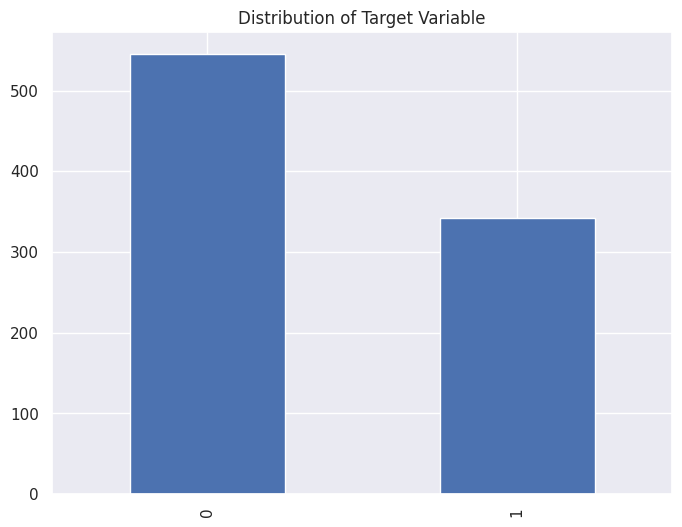

In [141]:
(titanic['Survived'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()

###  2. Encoding Categorical Data!

#### Simple Replacement of Categorical Data with a Number (Mapping & Dictionary)

Find the categorical column and separate it out with a different dataframe. To do so, use the select_dtypes() function from pandas:

In [201]:
titanic_copy = titanic.copy()

titanic_copy_categorical = titanic_copy.select_dtypes(exclude=[np.number])

titanic_copy_categorical.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [202]:
titanic_copy_categorical.describe()

,Sex
count,887
unique,2
top,male
freq,573


In [203]:
data_column_category = titanic_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['Sex'], dtype='object')

In [204]:
data_column_category=['Sex'] #we have one categorical data

Iterate through this category column and convert it to numeric data using LabelEncoder(). To do so, import the sklearn.preprocessing package and use the LabelEncoder() class to transform the data:

In [205]:
#import the LabelEncoder class

from sklearn.preprocessing import LabelEncoder

#Creating the object instance

label_encoder = LabelEncoder()

for i in data_column_category:

    titanic_copy[i] = label_encoder.fit_transform(titanic_copy[i])

print("Label Encoded Data: ")

titanic_copy.head()

Label Encoded Data: 


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


**LabelBinarizer Encoding**

In [147]:
titanic_copy = titanic.copy()

data_column_category = titanic_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['Sex'], dtype='object')

In [148]:
data_column_category=['Sex']

In [149]:
from sklearn.preprocessing import LabelBinarizer 

lb_encoder = LabelBinarizer() 

# lb_results = lb.fit_transform(autinsurance_copy[i])

# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

# print(lb_results_df.head())


for i in data_column_category:

    titanic_copy[i] = lb_encoder .fit_transform(titanic_copy[i])

print("Label Encoded Data: ")

titanic_copy.head()

Label Encoded Data: 


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


###Standarization data ✅

In [262]:
from sklearn.preprocessing import StandardScaler
# initialize the scaler
scaler = StandardScaler()

# Apply the transormation


titanicStandarized =scaler.fit_transform(titanic_copy.drop('Survived',axis=1))
titanicStandarized[0]

array([ 0.83052363,  0.74026551, -0.52936601,  0.42990395, -0.4749808 ,
       -0.50358635])

Look at the column **Age** before and after apply standarization on our titanic data 🚢

In [264]:
titanic_v2=pd.DataFrame(titanicStandarized,columns=['Pclass',	'Sex',	'Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare'])

titanic_v2

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507
...,...,...,...,...,...,...
882,-0.365376,0.740266,-0.175106,-0.475856,-0.474981,-0.388018
883,-1.561277,-1.350867,-0.741922,-0.475856,-0.474981,-0.046336
884,0.830524,-1.350867,-1.592145,0.429904,2.003301,-0.177984
885,-1.561277,0.740266,-0.245958,-0.475856,-0.474981,-0.046336


### Correlation

In [265]:
# Disply all Columns
pd.options.display.max_columns=7

# Calculate Correlation
corr_matrix = titanic_v2.corr()  # corr(autinsurance)
corr_matrix

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,1.000000,0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,0.129507,1.000000,0.091875,-0.113249,-0.244337,-0.181137
Age,-0.391492,0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,0.085026,-0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.020252,-0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,-0.548919,-0.181137,0.112329,0.158839,0.215470,1.000000


<Axes: >

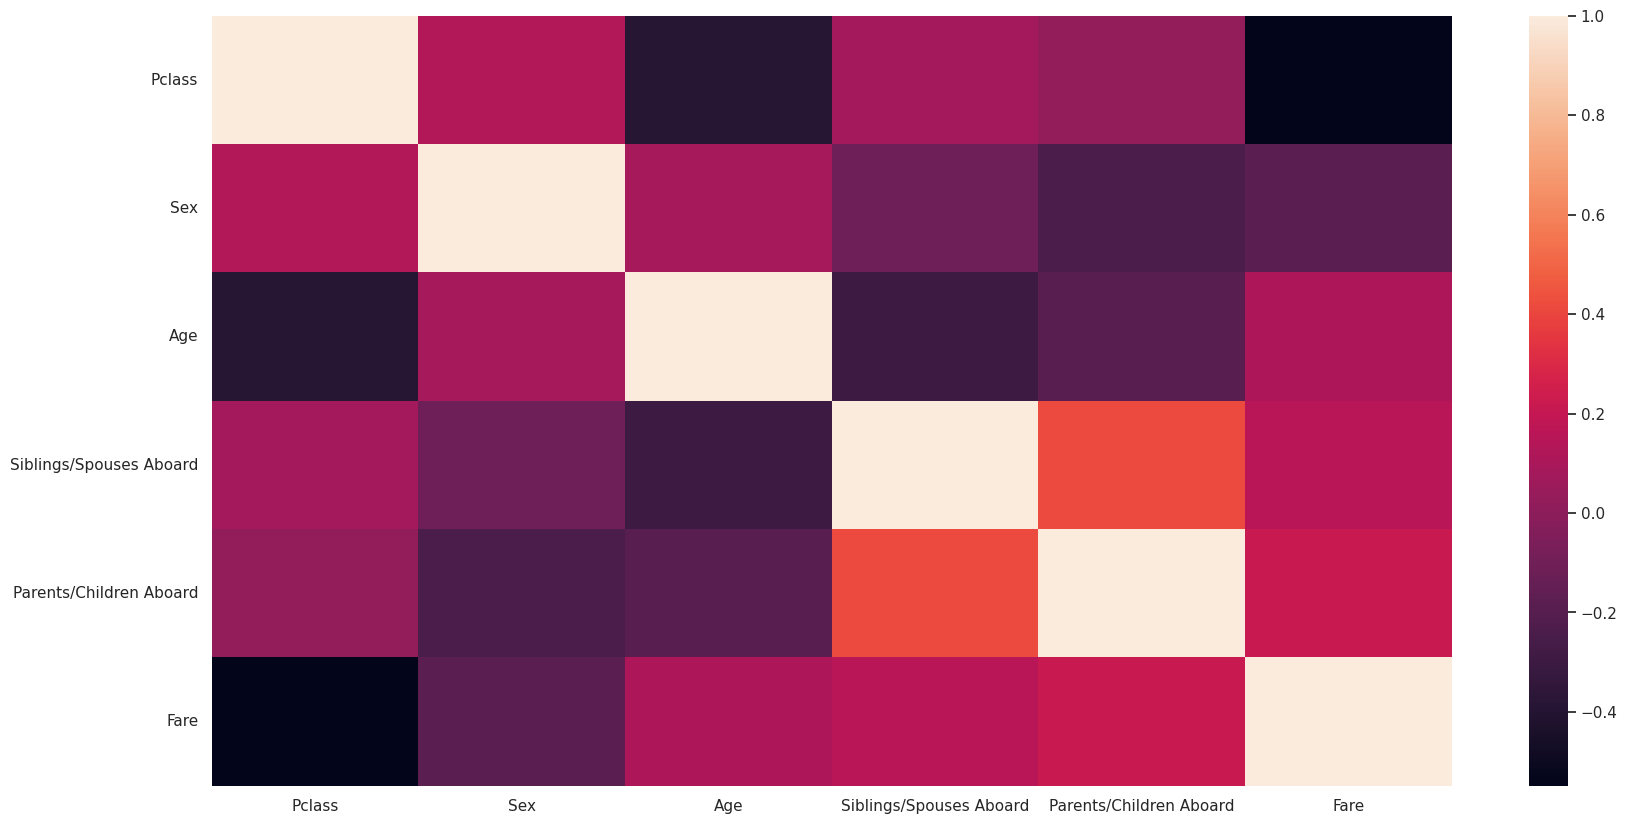

In [266]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(titanic_v2.corr())

## Logistic Regression Model (Sickit Learn)

### Data split & Scaling Data Preprocessing

In [268]:
# Identifying the X and y for both the training set and testing set
X = titanic_v2
y = titanic.Survived

In [269]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)

In [270]:
training_features

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
147,-0.365376,0.740266,0.497987,-0.475856,2.003301,-0.126732
11,-1.561277,-1.350867,2.021303,-0.475856,-0.474981,-0.115678
281,0.830524,0.740266,-0.741922,-0.475856,-0.474981,-0.487507
784,0.830524,0.740266,-2.017256,0.429904,2.003301,-0.235769
204,0.830524,-1.350867,-1.946404,-0.475856,0.764160,-0.439019
...,...,...,...,...,...,...
725,0.830524,-1.350867,-0.316810,0.429904,-0.474981,-0.490020
607,0.830524,-1.350867,0.675116,0.429904,5.720725,-0.020710
544,-0.365376,0.740266,-0.175106,-0.475856,-0.474981,-0.370682
643,0.830524,0.740266,-0.741922,-0.475856,-0.474981,-0.490606


In [271]:
test_features

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
437,-0.365376,-1.350867,1.100228,0.429904,0.764160,-0.121707
67,0.830524,-1.350867,-0.883626,3.147183,2.003301,-0.490020
693,0.830524,0.740266,1.029376,-0.475856,-0.474981,-0.487507
225,-0.365376,0.740266,-0.741922,-0.475856,-0.474981,-0.438265
665,0.830524,0.740266,0.958524,-0.475856,-0.474981,-0.487507
...,...,...,...,...,...,...
530,0.830524,-1.350867,-0.387662,-0.475856,2.003301,-0.199926
286,-0.365376,0.740266,0.887672,-0.475856,-0.474981,-0.388018
387,-0.365376,-1.350867,-0.883626,-0.475856,-0.474981,-0.408117
212,-0.365376,0.740266,0.037449,-0.475856,-0.474981,-0.388018


In [235]:
training_features.shape,test_features.shape

((709, 6), (178, 6))

In [241]:
training_features

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
147,-0.365376,0.740266,0.497987,-0.475856,2.003301,-0.126732
11,-1.561277,-1.350867,2.021303,-0.475856,-0.474981,-0.115678
281,0.830524,0.740266,-0.741922,-0.475856,-0.474981,-0.487507
784,0.830524,0.740266,-2.017256,0.429904,2.003301,-0.235769
204,0.830524,-1.350867,-1.946404,-0.475856,0.764160,-0.439019
...,...,...,...,...,...,...
725,0.830524,-1.350867,-0.316810,0.429904,-0.474981,-0.490020
607,0.830524,-1.350867,0.675116,0.429904,5.720725,-0.020710
544,-0.365376,0.740266,-0.175106,-0.475856,-0.474981,-0.370682
643,0.830524,0.740266,-0.741922,-0.475856,-0.474981,-0.490606


We move on now to estimators for classification problems that actually use the input data (unlike the `DummyClassifier`).  To begin, let's examine the [`LogisticRegression` estimator](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). In order to determine a logistic regression model, a nonlinear system of equations needs to be solved iteratively; thus, when we instantiate the esitmator, we can specify the solver and the maximum number of iterations. For instance:

```python
>>> from sklearn.linear_model import LogisticRegression
>>> clf = LogisticRegression(solver='newton-cg', max_iter=1000)
```

As with other *Scikit-Learn*'s estimator classes, the `.fit` and `.predict` methods are used to construct the model and make predictions.

In [272]:
# Fitting Decision Tree Classification to the Training set
from sklearn.linear_model import LogisticRegression  # Class

In [273]:
# Create the model using LogisticRegression class
LRModel = LogisticRegression(random_state = 45) # SEED. IN R

#, solver='newton-cg', max_iter=1000

###Transform target variable

In [274]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(training_target)

#view transformed values
print(y_transformed)

[0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 

In [275]:
# Fitting the Model
LRModel.fit(training_features, y_transformed)

LogisticRegression(random_state=45)

In [276]:
%%time

# Predicting the Test set results

LR_pred =LRModel.predict(test_features)

CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 1.91 ms


In [277]:
# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [278]:
# Making the Confusion Matrix
y_test_transformed = lab.fit_transform(test_target)

CMLR= confusion_matrix(y_test_transformed, LR_pred)
CMLR

array([[97, 15],
       [21, 45]])

In [279]:
# Accuracy Score
ACLR= accuracy_score(y_test_transformed, LR_pred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))

 LGR Prediction Accuracy : 79.78%


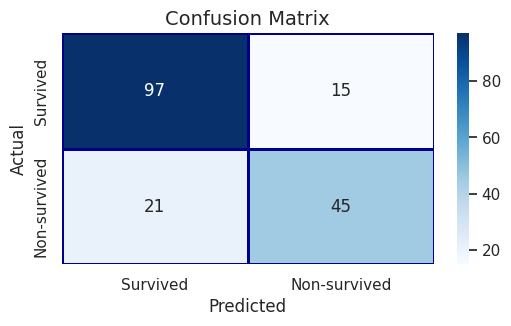

In [280]:
target = 'Survived'
CMTD = pd.crosstab(y_test_transformed,LR_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['Survived', 'Non-survived'],
            yticklabels=['Survived', 'Non-survived'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Logistic Regression Model (From scratch)

In [281]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [282]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [283]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [169]:
def log_los(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [284]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [285]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [286]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

In [287]:
from sklearn.metrics import log_loss
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        A = np.clip(A, 1e-15, 1 - 1e-15)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)
        
    return W,b,loss_history

In [296]:
X1=titanic_v2['Pclass'].to_numpy()
X2=titanic_v2['Age'].to_numpy()
X3=titanic_v2['Sex'].to_numpy()
X4=titanic_v2['Siblings/Spouses Aboard'].to_numpy()
X5=titanic_v2['Parents/Children Aboard'].to_numpy()
X6=titanic_v2['Fare'].to_numpy()
y=titanic['Survived'].to_numpy()
#Reshaping Dim
X1=X1.reshape(X1.shape[0],1)
X2=X2.reshape(X1.shape[0],1)
X3=X3.reshape(X1.shape[0],1)
X4=X4.reshape(X1.shape[0],1)
X5=X5.reshape(X1.shape[0],1)
X6=X6.reshape(X1.shape[0],1)

y=y.reshape(y.shape[0],1)
y.shape

(887, 1)

In [254]:
# X2

array([[-0.52936601],
       [ 0.60426454],
       [-0.24595837],
       [ 0.39170881],
       [ 0.39170881],
       [-0.17510646],
       [ 1.73789509],
       [-1.9464042 ],
       [-0.17510646],
       [-1.09618128],
       [-1.80470038],
       [ 2.02130273],
       [-0.67106983],
       [ 0.67511645],
       [-1.09618128],
       [ 1.808747  ],
       [-1.9464042 ],
       [-0.4585141 ],
       [ 0.10830118],
       [-0.52936601],
       [ 0.39170881],
       [ 0.32085691],
       [-1.02532937],
       [-0.10425455],
       [-1.52129274],
       [ 0.60426454],
       [-0.24595837],
       [-0.74192174],
       [-0.38766219],
       [-0.4585141 ],
       [ 0.74596836],
       [ 1.31278364],
       [-0.81277364],
       [ 2.58811801],
       [-0.10425455],
       [ 0.88767218],
       [-0.81277364],
       [-0.60021792],
       [-0.81277364],
       [-1.09618128],
       [ 0.74596836],
       [-0.17510646],
       [-1.87555229],
       [-0.74192174],
       [ 0.03744927],
       [-0

In [297]:
# Création de la matrice X, inclut le Biais
X = np.hstack((X1,X2,X3,X4,X5,X6 ,np.ones(X1.shape)))
print(X.shape)
print(X[:10])

(887, 7)
[[ 0.83052363 -0.52936601  0.74026551  0.42990395 -0.4749808  -0.50358635
   1.        ]
 [-1.56127657  0.60426454 -1.35086667  0.42990395 -0.4749808   0.78341245
   1.        ]
 [ 0.83052363 -0.24595837 -1.35086667 -0.47585568 -0.4749808  -0.49001959
   1.        ]
 [-1.56127657  0.39170881 -1.35086667  0.42990395 -0.4749808   0.41794815
   1.        ]
 [ 0.83052363  0.39170881  0.74026551 -0.47585568 -0.4749808  -0.48750723
   1.        ]
 [ 0.83052363 -0.17510646  0.74026551 -0.47585568 -0.4749808  -0.47930085
   1.        ]
 [-1.56127657  1.73789509  0.74026551 -0.47585568 -0.4749808   0.39307576
   1.        ]
 [ 0.83052363 -1.9464042   0.74026551  2.2414232   0.76416028 -0.22571907
   1.        ]
 [ 0.83052363 -0.17510646 -1.35086667 -0.47585568  2.00330136 -0.42553629
   1.        ]
 [-0.36537647 -1.09618128 -1.35086667  0.42990395 -0.4749808  -0.0449134
   1.        ]]


In [298]:
W,b,loss_history=regression_logistique(X,y)

[1.1032071158199264, 1.0777383908782399, 1.0533240690071564, 1.029931248900643, 1.0075261508921283, 0.9860744741248355, 0.9655417170841043, 0.9458934482905239, 0.9270955160876295, 0.9091141911664695, 0.8919162433217332, 0.8754689643898216, 0.8597401601017288, 0.8446981408582763, 0.8303117412805969, 0.8165503891400504, 0.8033842282107786, 0.7907842823875092, 0.778722636295893, 0.7671726041517065, 0.756108863326637, 0.7455075385407053, 0.7353462327729058, 0.7256040089998017, 0.7162613316474322, 0.707299978456934, 0.6987029332366702, 0.6904542686659577, 0.6825390266384626, 0.6749431019875352, 0.6676531339764032, 0.6606564086736273, 0.6539407742218916, 0.6474945700017031, 0.641306569777284, 0.6353659381104881, 0.6296621986814005, 0.6241852127030288, 0.6189251653853408, 0.6138725583850547, 0.6090182063373754, 0.6043532358494306, 0.5998690856804686, 0.5955575071843074, 0.5914105644026254, 0.5874206334488462, 0.5835804010038945, 0.5798828618622256, 0.5763213155323234, 0.5728893619261962, 0.56

Text(0.5, 1.0, 'Evolution des erreurs')

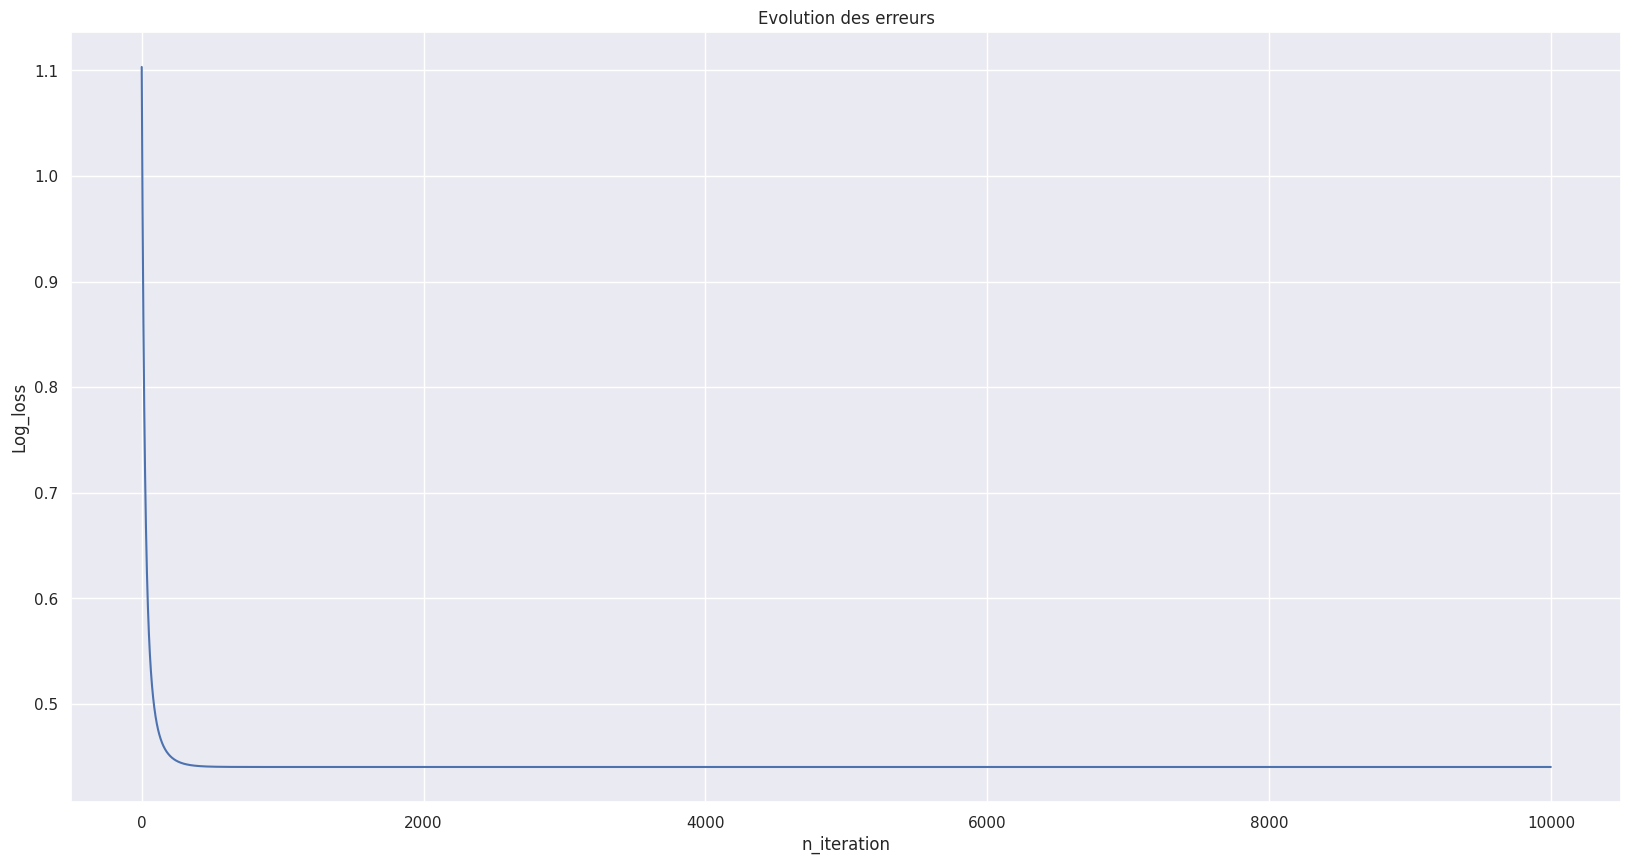

In [299]:
# print(loss_history)
plt.plot(loss_history)
plt.xlabel('n_iteration')
plt.ylabel('Log_loss')
plt.title('Evolution des erreurs')

###Prediction

In [178]:
#X=np.array([[2.  ,   36.5,     1. ,     0. ,     2. ,    26. ,     1.]])

In [179]:
y_pred = predict(X, W, b)

In [180]:
# Accuracy Score
ACFS= accuracy_score(y, y_pred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACFS * 100))

 LGR Prediction Accuracy : 74.05%


###Models compared

In [181]:
# Accuracy Score
print(' Logistic Regression From scratch Prediction Accuracy : {:.2f}%'.format(ACFS* 100))

print(" Lgistic Regression Prediction Accuracy  : {:.2f}%".format(ACLR * 100))

 Logistic Regression From scratch Prediction Accuracy : 74.05%
 Lgistic Regression Prediction Accuracy  : 80.34%
